# Lesson 02: Rates and Efficiencies
### Dylan Temples 
June 24, 2019

The goal of this lesson is to illustrate the effects of trigger and cut efficiencies as well as demonstrate the use of the radionuclide tables.

## Learning Objectives
Physics Topics:
- Nuclear decays and radiation spectra
- Detector efficiencies

Programming Topics:
- 

## $^{127}$Xe Electron-capture decays
$^{127}$Xe is a radioactive isotope of xenon which decays by electron capture. In this process, an inner shell electron (K-, L-, or M- shell) is abosrbed by a proton in the nucleus, turning it into a neutron and emitting a neutrino in the process. Often, this capture leaves the $^{127}I$ nucleus in an excited state. This excited nuclear state will decay with some characteristic lifetime by emitting some series of $\gamma$'s (photons), these are the *primary* particles emitted in the decay.

The electron that was captured by the nucleus leaves a vacancy in one of the inner electron orbitals (shells). This is an unstable state for an atom to be in, and thus it wants to decay to some stable state. The unstable state relaxes through the process of an electron from a higher orbital dropping down to fill the more-inner vacancy. There is an energy difference between the orbitals, so as the electron goes to a lower energy state, the atom must emit some energy. This emission is in the form of $x$-ray photons, some of which have a large probability of knocking out another electron from the atom (Auger electron), these photons and electrons are the *secondary* particles of the decay. This process of outer-shell electrons droppping down to fill inner-shell vacancies continues until all inner-shell vacancies are filled and leaves a highly ionized iodine atom.

The resulting x-ray (and thus Auger electron) energy spectrum is characteristic of the element, and thus can be used for identification of materials.

## Using the Radionuclide Tables
The energies of the particles emitted in radioactive decays of specific isotopes are relatively well-known and tabulated in many locations available online. One of which is hosted by the "IAEA - Nuclear Data Section", available at https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html.

Go to this page, and search for the isotope $^{127}$Xe, and go tot he "Decay Radiation" tab. From the numbers given here, one can estimate the relative intensities of the $K$-shell capture peak and the $L$-shell capture peak.

In [1]:
# -- Auger electron intensities

# intensity of Ae: filling an L-shell vacancy
Int_AU_L00 = 0.96600  
Int_AU_KLL = 0.07800   # intensity of Ae: filling an K-shell vacancy w/ L-shell electron, emitting L-shell Ae
Int_AU_KLX = 0.03590   # intensity of Ae: filling an K-shell vacancy w/ L-shell electron, emitting any other shell Ae
Int_AU_K00 = 0.11800   # intensity of Ae: filling an K-shell vacancy
Int_AU_KXY = 0.00412   # intensity of Ae: filling an K-shell vacancy w/ any other shell electron, emitting Ae from any other shell

print(Int_AU_K00-Int_AU_KLL-Int_AU_KLX-Int_AU_KXY)

In [2]:
# -- For each K-shell decay, how many L-shells do you expect?
Int_L_to_K = Int_AU_L00 / Int_AU_K00

print(Int_L_to_K)
# Note that this is really the intensities of Auger electrons, we have
# neglected the contribution to the K-shell from X-rays

8.186440677966102


## $^{127}$Xe Decays in XELDA
As noted above, an electron capture on any specific shell results in secondary particles with kinetic energ that sums to a characteristic value -- roughly the binding energy of the captured electron. For $^{127}$Xe (really $^{127}$I) the energies are $33.2$($5.2$) keV for the $K-$($L-$)shell. The entire energy release in the decay is this plus the energy of all the $\gamma$s coming from the nuclear decay.

In XELDA, the $\gamma$s are too-high in energy to be well resolved, this is by design because we are not interested in them. We are specifically interested in the secodary effects: the relaxation of the excited atomic state. Thus, we are looking for peaks in energy near the binding energies -- these are events where all the $\gamma$s escaped the detector without interacting, and we have isolated $x$-ray/Auger effects.

This, coupled with other effects introduces a relative efficiency in detecting isolated $^{127}$Xe captures on different shells. The objective of this lesson/assignment is to determine what the relative efficicency between the $K-$ and $L-$shells.

In [3]:
# -- Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [4]:
# -- Open the data
filename = "rawdaq_1901021108_parsed.dat"
data = np.loadtxt(filename, delimiter=",")

# -- Save data as arrays
EvtID_array = data[:,0]  # first column
S1_array    = data[:,1]  # second column
S2_array    = data[:,2]  # third column
TS2_array   = data[:,3]  # fourth column
DT_array    = data[:,4]  # fifth column
R2_array    = data[:,5]  # sixth column

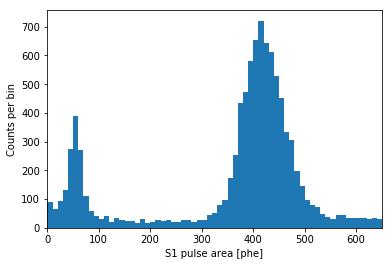

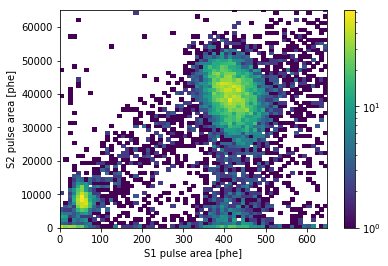

In [5]:
# -- Define cuts
dt_cut_lims    = np.array([2.5, 7.5])
dt_cut_indexer = (DT_array >= dt_cut_lims[0]) * (DT_array <= dt_cut_lims[1])

# -- Define bins
n_s1s2_bins = 100

# -- Create a 1D histogram of S1 size
plt.figure(0)
plt.hist(S1_array[dt_cut_indexer], bins=n_s1s2_bins)
plt.xlabel("S1 pulse area [phe]")
plt.ylabel("Counts per bin")
plt.xlim([0.0 , 650.0])

# -- Create a 2D histogram of S1 size vs S2 size
plt.figure(1)
plt.hist2d(S1_array[dt_cut_indexer],S2_array[dt_cut_indexer], bins=n_s1s2_bins, norm=LogNorm())
plt.xlabel("S1 pulse area [phe]")
plt.ylabel("S2 pulse area [phe]")
plt.xlim([0.0 , 650.0])
plt.ylim([0.0 , 650e2])
plt.colorbar()

We've discussed the shape of the two-dimensional histogram in the previous lesson. Recall that the stuff below the K-shell comes from events where there was a real K-shell capture that produced an S1, but the S2 that was matched in the event came from something else. When we project this 2D histogram onto the $x$-axis, we're marginalizing over the S2 information in the data.

Let's find the rate of $K$-shell decays in this data set.

Mean:  419.32121399299604  +/-  0.46760912356802814 phe S1
Width:  38.71226154990361  +/-  0.5680128842795388 phe S1


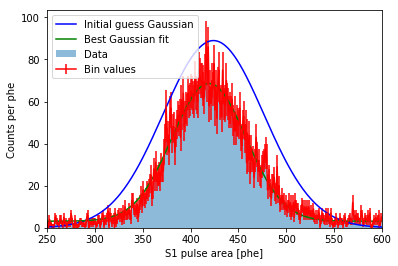

In [6]:
# -- First define the data we're interested in
K_s1_lims = np.array([250. , 600.])
K_s1_indexer = (S1_array >= K_s1_lims[0]) * (S1_array <= K_s1_lims[1])
ROI_indexer = K_s1_indexer * dt_cut_indexer

# -- Define our binning
K_s1_bin_step = 1.0
K_s1_bins = np.arange(start=K_s1_lims[0], stop=K_s1_lims[1]+K_s1_bin_step, step=K_s1_bin_step)

# -- Then create a 1D histogram
plt.figure(2)
n, bins, patches = plt.hist(S1_array[ROI_indexer], bins=K_s1_bins, label="Data", alpha=0.5)
plt.xlabel("S1 pulse area [phe]")
plt.ylabel("Counts per phe")
plt.xlim(K_s1_lims)

# -- Now plot bin centers
bin_centers = (bins[1:len(bins)]+bins[0:len(bins)-1])/2.
plt.errorbar(bin_centers, n, yerr=np.sqrt(n), color='r', label="Bin values")

# -- Define a fitting function
def gaussian(x, a, b, c, d):
    return a + b*np.exp(-0.5 * ((x-c)/d) * ((x-c)/d))

# -- Next fit the data
from scipy.optimize import curve_fit

x_data = bin_centers
y_data = n
y_errs = np.sqrt(n)

# -- Set an initial guess for parameters
param_guess = np.array([ np.min(y_data) , np.max(y_data) , np.mean(S1_array[ROI_indexer]), np.std(S1_array[ROI_indexer]) ])
gss_y_vals = gaussian(x_data, param_guess[0], param_guess[1], param_guess[2], param_guess[3])
plt.plot(x_data, gss_y_vals, color='b', label="Initial guess Gaussian")

# -- Do the fit, plot it
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=param_guess)
perr = np.sqrt(np.diag(pcov))
fit_y_vals = gaussian(x_data, popt[0], popt[1], popt[2], popt[3])
plt.plot(x_data, fit_y_vals, color='g', label="Best Gaussian fit")

print("Mean: ", popt[2], " +/- ", perr[2], "phe S1")
print("Width: ", popt[3], " +/- ", perr[3], "phe S1")

# -- Turn on a plot key
plt.legend(loc='upper left')

Total events in ROI:  7073
Background events in ROI:  730.6524158943658
K-shell events in ROI:  6342.0


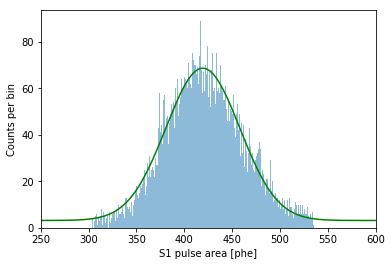

In [7]:
# -- Define what our parameters mean
K_mean_S1 = popt[2]
K_wdth_S1 = popt[3]
N_bkgd_per_bin = popt[0]

# -- Grab all data within region around peak
N_devs = 3.0
K_s1_max = K_mean_S1 + N_devs*K_wdth_S1
K_s1_min = K_mean_S1 - N_devs*K_wdth_S1
K_s1_fit_indexer = (S1_array >= K_s1_min) * (S1_array <= K_s1_max) * dt_cut_indexer

# -- Plot that data, with fit
plt.figure(3)
n, bins, patches = plt.hist(S1_array[K_s1_fit_indexer], bins=K_s1_bins, label="Data", alpha=0.5)
plt.xlabel("S1 pulse area [phe]")
plt.ylabel("Counts per bin")
plt.xlim(K_s1_lims)
plt.plot(x_data, fit_y_vals, color='g', label="Best Gaussian fit")

# -- Count all the entries in the histogram
N_total_events = len(S1_array[K_s1_fit_indexer])

# -- How many background events are there in this range
N_bkgnd_events = N_bkgd_per_bin * (K_s1_max-K_s1_min)

# -- How many events are coming from K-shell decays
N_Kshll_events = np.floor(N_total_events-N_bkgnd_events)

print("Total events in ROI: ", N_total_events)
print("Background events in ROI: ", N_bkgnd_events)
print("K-shell events in ROI: ", N_Kshll_events)

In [8]:
# -- Convert this to a rate
run_livetime = 297.419725   # minutes
Kshell_rate  = N_Kshll_events / (run_livetime * 60.0)  # Hz
print("Xe127 K-shell rate: ", Kshell_rate, " Hz")

Xe127 K-shell rate:  0.3553900132212145  Hz


# Assignment
The following exercises will take you through determining our L-shell detection efficiency.

## Problem 1.
Assume that 1 in 10 K-shell decays are completely isolated, meaning the $\gamma$s escaped XELDA without interacting. In this case what is the activity in the detector? Remember to include the fraction of $^{127}$Xe decays that end in the emission of an Auger electron to fill a K-shell vacancy in your calculation.

Activity is defined as number of decays per unit time: the unit Bequerel (Bq) is a standard unit that is equivalent to one decay per second. Look up the relation between the activity of a source $A$, its lifetime $\tau$, and the number of atoms in the sample $N$. How many $^{127}$Xe atoms are in the detector?

In [9]:
# -- Solution to Problem 1 here
isolation_factor = 0.1
K_capture_factor = Int_AU_K00
Xe127_rate = Kshell_rate / (isolation_factor * K_capture_factor)
print("Total Xe127 activity: ", Xe127_rate, " Bq")

Xe127_lifetime = 36.346 * 24. * 60.0 * 60.0    # seconds
N_Xe127_atoms = Xe127_lifetime * Xe127_rate
print("Total Xe127 atoms: ", N_Xe127_atoms/1e6, " million")

Total Xe127 activity:  30.1177977306114  Bq
Total Xe127 atoms:  94.57875155377168  million


## Problem 2.
Find the number of events in the $L$-shell peak, remembering to account for backgrounds. To do this, follow the same procedure we did for the $K$-shell peak. What is the $L$-shell rate?

Mean:  55.14684510320663  +/-  0.39906731970942855 phe S1
Width:  11.300086259099874  +/-  0.44127831411086416 phe S1
Total events in ROI:  1317
Background events in ROI:  320.9224039393596
L-shell events in ROI:  996.0
Xe127 L-shell rate:  0.055813379559812304  Hz


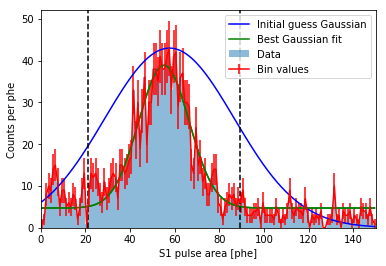

In [10]:
# -- Solution to Problem 2 here

# -- First define the data we're interested in
L_s1_lims = np.array([0. , 150.])
L_s1_indexer = (S1_array >= L_s1_lims[0]) * (S1_array <= L_s1_lims[1])
ROI_indexer = L_s1_indexer * dt_cut_indexer

# -- Define our binning
L_s1_bin_step = 1.0
L_s1_bins = np.arange(start=L_s1_lims[0], stop=L_s1_lims[1]+L_s1_bin_step, step=L_s1_bin_step)

# -- Then create a 1D histogram
plt.figure(2)
n, bins, patches = plt.hist(S1_array[ROI_indexer], bins=L_s1_bins, label="Data", alpha=0.5)
plt.xlabel("S1 pulse area [phe]")
plt.ylabel("Counts per phe")
plt.xlim(L_s1_lims)

# -- Now plot bin centers
bin_centers = (bins[1:len(bins)]+bins[0:len(bins)-1])/2.
plt.errorbar(bin_centers, n, yerr=np.sqrt(n), color='r', label="Bin values")

x_data = bin_centers
y_data = n
y_errs = np.sqrt(n)

# -- Set an initial guess for parameters
param_guess = np.array([ np.min(y_data) , np.max(y_data) , np.mean(S1_array[ROI_indexer]), np.std(S1_array[ROI_indexer]) ])
gss_y_vals = gaussian(x_data, param_guess[0], param_guess[1], param_guess[2], param_guess[3])
plt.plot(x_data, gss_y_vals, color='b', label="Initial guess Gaussian")

# -- Do the fit, plot it
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=param_guess)
perr = np.sqrt(np.diag(pcov))
fit_y_vals = gaussian(x_data, popt[0], popt[1], popt[2], popt[3])
plt.plot(x_data, fit_y_vals, color='g', label="Best Gaussian fit")

print("Mean: ", popt[2], " +/- ", perr[2], "phe S1")
print("Width: ", popt[3], " +/- ", perr[3], "phe S1")

# -- Turn on a plot key
plt.legend(loc='upper right')

# -- Define what our parameters mean
L_mean_S1 = popt[2]
L_wdth_S1 = popt[3]
N_bkgd_per_bin = popt[0]

# -- Grab all data within region around peak
N_devs = 3.0
L_s1_max = L_mean_S1 + N_devs*L_wdth_S1
L_s1_min = L_mean_S1 - N_devs*L_wdth_S1
L_s1_fit_indexer = (S1_array >= L_s1_min) * (S1_array <= L_s1_max) * dt_cut_indexer

# -- Plot that data, with fit
plt.plot(x_data, fit_y_vals, color='g', label="Best Gaussian fit")
ylims = plt.gca().get_ylim()
plt.plot( [L_s1_max,L_s1_max] , ylims , 'k--')
plt.plot( [L_s1_min,L_s1_min] , ylims , 'k--')
plt.ylim(ylims)

# -- Count all the entries in the histogram
N_total_events = len(S1_array[L_s1_fit_indexer])

# -- How many background events are there in this range
N_bkgnd_events = N_bkgd_per_bin * (L_s1_max-L_s1_min)

# -- How many events are coming from K-shell decays
N_Lshll_events = np.floor(N_total_events-N_bkgnd_events)
Lshell_rate  = N_Lshll_events / (run_livetime * 60.0)  # Hz

print("Total events in ROI: ", N_total_events)
print("Background events in ROI: ", N_bkgnd_events)
print("L-shell events in ROI: ", N_Lshll_events)
print("Xe127 L-shell rate: ", Lshell_rate, " Hz")

## Problem 3.
Assume XELDA has 100% efficiency at detecting isolated $K$-shell captures. What is the efficiency of detecting a $L$-shell capture?

Recall the ratio of intensities of the two peaks from the beginning of this lesson.

In [11]:
# -- Solution to Problem 3 here
N_L_expected = Int_L_to_K * N_Kshll_events
N_L_observed = N_Lshll_events
print("Expected: ", N_L_expected)
print("Observed: ", N_L_observed)
L_rel_eff = N_L_observed / N_L_expected
print("Efficiency: ", L_rel_eff*100. , "%")

Expected:  51918.40677966102
Observed:  996.0
Efficiency:  1.91839476936758 %


## Problem 4.
Is this a high or low efficiency? What do you think is the main factor contributing to this number:
a) assumptions made in the calculation,
b) detector effects, or
c) physics of the EC decay?

Describe your reasoning.

Low. (a). We have only considered the Auger emission of the $K$-shell, even though it is much more likely to come out as an $x$-ray instead of an Auger electron.